In [644]:
import numpy as np
import statsmodels.api as sm
import copy
from scipy.stats import t
import matplotlib.pyplot as plt

In [645]:
PRECISION = 5
np.set_printoptions(suppress=True)

In [646]:
def formatTabular(arr) -> None:
    arr = np.array(arr)
    # 1d array
    if len(arr.shape) == 1:
        for ind, el in enumerate(arr):
            print(round(el, PRECISION), end=' & ') if ind != len(arr) - 1 \
                  else \
            print(round(el, PRECISION), end=' \\\\ \n \\hline \n')
    # 2d array
    elif len(arr.shape) == 2:
        for row in arr:
            for ind, el in enumerate(row):
                print(round(el, PRECISION), end=' & ') if ind != len(row)- 1 \
                    else \
                print(round(el, PRECISION), end=' \\\\ \n \\hline \n')
    
    else:
        raise Exception("Invalid array dimension")

In [647]:
data = """
1,158574 1,194067 1,745872 1,566271 1,825556 1,942503
1,238868 1,913419 1,182653 1,044649 1,304209 1,924039
1,564043 1,561357 1,070589 1,778954 1,226447 1,824122
1,737266 1,798975 1,952239 1,752281 1,247871 1,54796
1,364544 1,03122 1,380596 1,688101 1,987396 1,058504
1,535295 1,742973 1,580401 1,063356 1,999237 1,425459
1,780725 1,306711 1,972594 1,68627 1,582629 1,767235
1,135044 1,139164 1,686178 1,220069 1,034577 1,019745
1,246498 1,114597 1,079653 1,333415 1,054445 1,156743
1,416456 1,349223 1,68038 1,003235 1,471908 1,095523
1,611866 1,972991 1,443953 1,014008 1,91699 1,182531
1,520585 1,427992 1,464156 1,011505 1,108341 1,981536
1,229896 1,304392 1,852107 1,705496 1,725639 1,21482
1,726829 1,866756 1,074984 1,09888 1,983154 1,256935
1,77279 1,363353 1,227454 1,076754 1,656758 1,675253
1,418256 1,072481 1,123447 1,438917 1,059481 1,080325
1,119724 1,947356 1,372631 1,635578 1,94058 1,112827
1,728446 1,802332 1,365001 1,184759 1,119633 1,880032
1,161107 1,359294 1,956206 1,143406 1,49144 1,688437
1,963561 1,271859 1,250008 1,19367 1,466262 1,624409
"""

data = data.strip().split('\n')
data = [list(map(float, line.replace(',', '.').split())) for line in data]
# data = np.array(data)
dataCopy = copy.deepcopy(data)
# data

In [648]:
N = 9
# N = 8

n = 52
alpha = (n - 53)/40

print(f'N = {N}, alpha = {alpha}')

N = 9, alpha = -0.025


In [649]:
# y + alpha
additionalData = [14.77, 13.41, 13.84, 13.60, 13.23, 14.88, 15.39, 9.56, 10.37, 11.95,
                  14.13, 13.83, 12.51, 14.9, 15.31, 10.67, 12.52, 14.18, 13.02, 15.16]
# additionalData = [14.65, 15.06, 13.37, 15.90, 10.41, 14.25, 15.14, 11.54, 10.05, 12.38,
#                   13.80, 14.62, 13.11, 12.60, 12.80, 9.82, 13.30, 15.14, 15.01, 12.44]

# y 
y = [round(el - alpha, 3) for el in additionalData]

# y

In [650]:
if len(additionalData) == len(y):
    for i in range(len(y)):
        dataCopy[i].extend([additionalData[i], y[i]])
else:
    raise Exception("Ivalid data")

dataCopy

[[1.158574, 1.194067, 1.745872, 1.566271, 1.825556, 1.942503, 14.77, 14.795],
 [1.238868, 1.913419, 1.182653, 1.044649, 1.304209, 1.924039, 13.41, 13.435],
 [1.564043, 1.561357, 1.070589, 1.778954, 1.226447, 1.824122, 13.84, 13.865],
 [1.737266, 1.798975, 1.952239, 1.752281, 1.247871, 1.54796, 13.6, 13.625],
 [1.364544, 1.03122, 1.380596, 1.688101, 1.987396, 1.058504, 13.23, 13.255],
 [1.535295, 1.742973, 1.580401, 1.063356, 1.999237, 1.425459, 14.88, 14.905],
 [1.780725, 1.306711, 1.972594, 1.68627, 1.582629, 1.767235, 15.39, 15.415],
 [1.135044, 1.139164, 1.686178, 1.220069, 1.034577, 1.019745, 9.56, 9.585],
 [1.246498, 1.114597, 1.079653, 1.333415, 1.054445, 1.156743, 10.37, 10.395],
 [1.416456, 1.349223, 1.68038, 1.003235, 1.471908, 1.095523, 11.95, 11.975],
 [1.611866, 1.972991, 1.443953, 1.014008, 1.91699, 1.182531, 14.13, 14.155],
 [1.520585, 1.427992, 1.464156, 1.011505, 1.108341, 1.981536, 13.83, 13.855],
 [1.229896, 1.304392, 1.852107, 1.705496, 1.725639, 1.21482, 12.51, 12.5

In [651]:
def myCalculateRegression(Z, Y):
    _Z = np.array(Z) # Отклики
    _Y = np.array(Y) # Регрессоры

    _n, _k = _Z.shape # Количество наблюдений в наборе данных (n)
                      # Количество предикторов (k)

    # добавление свободного члена
    x0 = np.array([[1] for _ in range(_n)])
    _Z = np.hstack((x0, _Z))

    # коэффициенты
    _x = np.linalg.inv(_Z.T @ _Z) @ _Z.T @ _Y

    # предсказания
    _y = np.zeros(_n) 
    for i in range(_n):
        _y[i] = _x[0]
        for j in range(1, _k + 1):
            _y[i] += _Z[i][j] * _x[j]

    # t-статистика && доверительный интервал

    alpha = 0.05 / 2 # уровень значимости теста (95% для двустророннего)
    k = _n - _k - 1  # число степеней свободы 
    t_k = t.ppf(1 - alpha, df=k) # табличное значение при k степенй свободы и alpha значимости

    # оценка дисперсии остатков(σ^2)
    sigma2 = 0
    for j in range(_n):
        sigma2 += (_Y[j] - _y[j])**2
    sigma2 *= 1 / (_n - _k - 1)

    _t = np.zeros(_k + 1) 
    _upper = np.zeros(_k + 1)
    _lower = np.zeros(_k + 1)
    for i in range(_k + 1):
        # стандратная ошибка (SE)
        SE = np.sqrt(sigma2 * np.linalg.inv(_Z.T @ _Z)[i][i])

        # t-статистика
        _ti = _x[i] / SE
        _t[i] = _ti

        # нижние 95%
        _lower[i] = _x[i] - t_k * SE
        
        # верхние 95%
        _upper[i] = _x[i] + t_k* SE

    print(f'оценка дисперсии остатков:\nσ^2: {round(sigma2, PRECISION)}\nσ: {np.round(np.sqrt(sigma2), PRECISION)}\n')
    print(f'коэффициенты:\n{_x}\n')
    print(f't-статистика:\n{_t}\n')
    print(f'нижние 95%:\n{_lower}\n')
    print(f'верхние 95%:\n{_upper}\n')

    return _y

In [652]:
_ = myCalculateRegression(data, y)

оценка дисперсии остатков:
σ^2: 1e-05
σ: 0.00382

коэффициенты:
[ 0.01702005  2.99863545  0.00618907 -0.00102846  0.00046174  2.99956383
  3.00008523]

t-статистика:
[   1.79294819  820.62189259    2.00415025   -0.34355288    0.14509494
 1091.22203284 1062.3420425 ]

нижние 95%:
[-0.00348784  2.99074125 -0.00048242 -0.00749578 -0.00641324  2.99362538
  2.99398429]

верхние 95%:
[0.03752793 3.00652966 0.01286056 0.00543885 0.00733672 3.00550227
 3.00618617]



In [653]:
def delEl(data, ind):
    for row in data:
        # print(f'old: {row}')
        del row[ind]
        # print(f'new: {row}\n')

In [654]:
# removing z4
delEl(data, 4 - 1)
# data

In [655]:
_ = myCalculateRegression(data, y)

оценка дисперсии остатков:
σ^2: 1e-05
σ: 0.00368

коэффициенты:
[ 0.01764842  2.9986069   0.00609859 -0.00095054  2.99959795  3.0000825 ]

t-статистика:
[   2.16635067  852.1389684     2.09081432   -0.33467129 1135.67554265
 1101.57629897]

нижние 95%:
[ 0.00017567  2.99105957 -0.00015743 -0.00704218  2.99393304  2.99424129]

верхние 95%:
[0.03512117 3.00615423 0.0123546  0.00514111 3.00526286 3.00592371]



In [656]:
# removing z3
delEl(data, 3 - 1)
# data

In [657]:
predicted = myCalculateRegression(data, y)

оценка дисперсии остатков:
σ^2: 1e-05
σ: 0.00357

коэффициенты:
[0.01623102 2.99882929 0.00625377 2.99941767 2.99990123]

t-статистика:
[   2.40457509  894.70255189    2.2389109  1195.92593893 1158.78592253]

нижние 95%:
[0.00184361 2.99168518 0.00030016 2.99407194 2.99438326]

верхние 95%:
[0.03061843 3.0059734  0.01220737 3.00476341 3.00541919]



In [658]:
def plot_predicted_vs_actual(Y, y_pred):
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    
    # Scatter plot: Actual vs Predicted
    plt.scatter(Y, y_pred, color='blue', label='Predicted vs Actual')
    
    # Add a 45-degree reference line (perfect prediction)
    min_val = min(min(Y), min(y_pred))
    max_val = max(max(Y), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    # Add labels and title
    plt.xlabel('Actual values (Y)')
    plt.ylabel('Predicted values (ŷ)')
    plt.title('Actual vs Predicted Values')
    
    # Add a legend
    plt.legend()
    
    # Show plot
    plt.show()

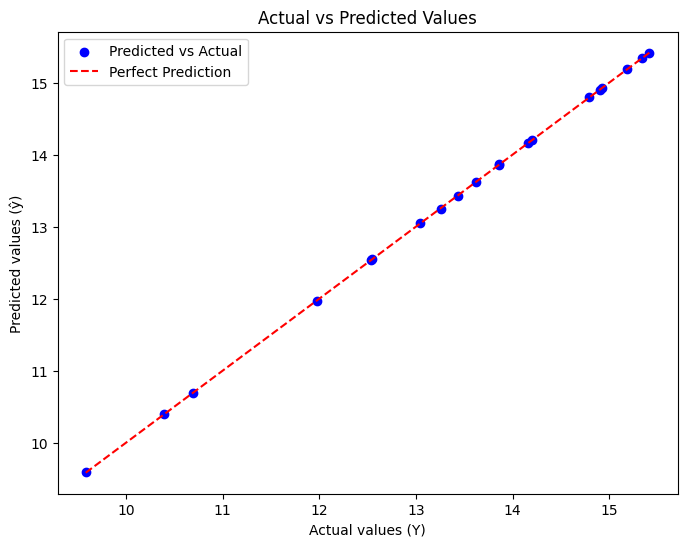

In [659]:
plot_predicted_vs_actual(y, predicted)

In [660]:
y_plus_alpha = np.array([-4.75, -4.56, -4.34, -4.17, -3.98, -3.82, -3.65, -3.48, -3.31, -3.13, -2.93, -2.72, -2.49, -2.24, -1.95, -1.64, -1.29, -0.91, -0.48, 0.00])
# y_plus_alpha = np.array([-3.81, -3.64, -3.48, -3.33, -3.19, -3.05, -2.92, -2.78, -2.65, -2.5, -2.34, -2.18, -1.99, -1.79, -1.56, -1.31, -1.03, -0.72, -0.38, 0.00])

_y = y_plus_alpha - alpha

_t = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])

_T = np.vstack((_t, _t**2, _t**3)).T

In [661]:
results = myCalculateRegression(_T, _y)
results

оценка дисперсии остатков:
σ^2: 4e-05
σ: 0.00605

коэффициенты:
[-4.97012693  4.94428699 -4.88081748  4.92832484]

t-статистика:
[-752.32615041   93.00244124  -42.01858581   67.66452102]

нижние 95%:
[-4.98413176  4.83158651 -5.12706258  4.77392218]

верхние 95%:
[-4.95612211  5.05698748 -4.63457238  5.0827275 ]



array([-4.73449859, -4.51957809, -4.32166918, -4.13707564, -3.9621012 ,
       -3.79304964, -3.6262247 , -3.45793014, -3.28446973, -3.1021472 ,
       -2.90726633, -2.69613087, -2.46504457, -2.21031118, -1.92823448,
       -1.61511821, -1.26726613, -0.88098199, -0.45256956,  0.02166742])

In [662]:
answer = np.vstack((_t, results, _y)).T
# formatTabular(answer)

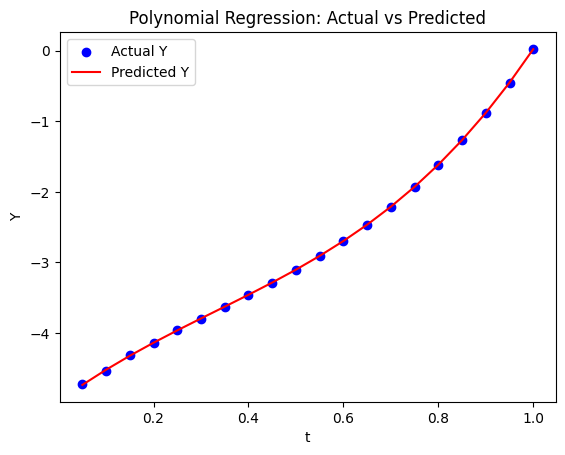

In [663]:
# Построение графика: известные значения Y и предсказанные значения
plt.scatter(_t, _y, color='blue', label='Actual Y')
plt.plot(_t, results, color='red', label='Predicted Y')
plt.xlabel('t')
plt.ylabel('Y')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [664]:
# def calculateRegression(x, y):
#     X = np.array(x) # Независимые переменные
#     Y = np.array(y) # Зависимые   переменные

#     # Добавляем константу (свободный член β0) для включения интерсепта
#     X = sm.add_constant(X)

#     # Создание и обучение модели
#     model = sm.OLS(Y, X)
#     results = model.fit()

#     # results.summary()
#     print("Коэффициенты:\n", [round(el, 9) for el in results.params], end='\n\n')
#     print("t-статистика:\n", [round(el, 9) for el in results.tvalues], end='\n\n')

#     intervals = results.conf_int()
#     lowerIntervals = []
#     upperIntervals = []
#     # print("Доверительные интервалы (95%):\n", , end='\n\n')
#     for el in intervals:
#         lowerIntervals.append(el[0])
#         upperIntervals.append(el[1])

#     print("Нижние 95%:\n", [round(el, 9) for el in lowerIntervals], end='\n\n')
#     print("Верхние 95%:\n", [round(el, 9) for el in upperIntervals], end='\n\n')

#     print('\n')

#     print('Коэффициенты & ',end='')
#     formatTabular(results.params)
#     print('t-статистика & ',end='')
#     formatTabular(results.tvalues)
#     print('Нижние 95\% & ',end='')
#     formatTabular(lowerIntervals)
#     print('Верхние 95\% & ',end='')
#     formatTabular(upperIntervals)

#     # return results